# Notebook 3.1 - Feature engineering evening sun

# Import libraries

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose the city

In [39]:
#Choose city ("Madrid", "Barcelona", or "Valencia")
city = "Valencia"

# Load cleaned data incl zip code

In [40]:
#Read corresponding file
if city == "Madrid":
    data = pd.read_csv('../../data/4_data_cleaned/madrid_cleaned_base_features.csv')
elif city == "Barcelona":
    data = pd.read_csv('../../data/4_data_cleaned/barcelona_cleaned_base_features.csv')
elif city == "Valencia":
    data = pd.read_csv('../../data/4_data_cleaned/valencia_cleaned_base_features.csv')
else:
    raise ValueError("City not recognized. Please choose either 'Madrid', 'Barcelona', or 'Valencia'.")

# Create feature on evening sun

We define an asset to have evening sun if one of the two conditions is met:
- Asset has a garden and orientation to the west
- Asset has a terrace, orientation to the west, and is on a higher floor than ground floor  or on the house's top floor (to also include those on the ground/first floor if it is the only floor) 

__Create copy of dataset on which to perform feature engineering__

In [41]:
data_incl_sun = data.copy()

__Create new feature__

In [42]:
# Create "HASEVENINGSUN" column based on the conditions explained
data_incl_sun['HASEVENINGSUN'] = (
    ((data_incl_sun['HASGARDEN'] == 1) & (data_incl_sun['HASWESTORIENTATION'] == 1)) |
    ((data_incl_sun['HASTERRACE'] == 1) & (data_incl_sun['HASWESTORIENTATION'] == 1) & ((data_incl_sun['ISINTOPFLOOR'] == 1) | (data_incl_sun['FLOORCLEAN'] > 0)))
).astype(int)

__Analyze result of new feature__

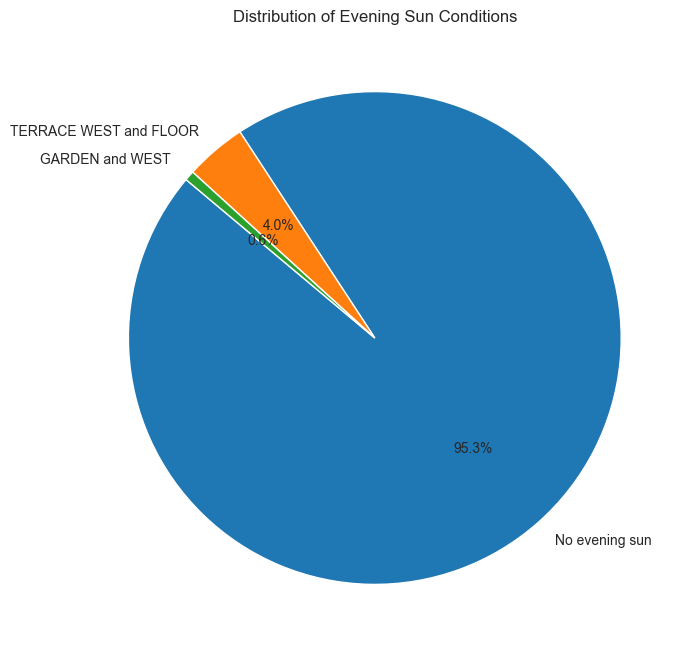

In [43]:
# Create auxiliary columns to analyze how many times each condition is met
data_incl_sun['EVENINGSUN_CONDITION'] = 'No evening sun'
data_incl_sun.loc[(data_incl_sun['HASGARDEN'] == 1) & (data_incl_sun['HASWESTORIENTATION'] == 1), 'EVENINGSUN_CONDITION'] = 'GARDEN and WEST'
data_incl_sun.loc[(data_incl_sun['HASTERRACE'] == 1) & (data_incl_sun['HASWESTORIENTATION'] == 1) & ((data_incl_sun['ISINTOPFLOOR'] == 1) | (data_incl_sun['FLOORCLEAN'] > 0)), 'EVENINGSUN_CONDITION'] = 'TERRACE WEST and FLOOR'

# Count the occurrences of each group
condition_counts = data_incl_sun['EVENINGSUN_CONDITION'].value_counts()

# Plot as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Evening Sun Conditions')
plt.show()

# Drop auxiliary column
data_incl_sun.drop(columns=['EVENINGSUN_CONDITION'], inplace=True)

# Write data incl. new features to csv

In [44]:
if city == "Madrid":
    data_incl_sun.to_csv("../../data/5_cleaned_and_feature_engineering/feature_evening_sun/madrid_cleaned_incl_evening_sun.csv", index=False)
elif city == "Barcelona":
    data_incl_sun.to_csv("../../data/5_cleaned_and_feature_engineering/feature_evening_sun/barcelona_cleaned_incl_evening_sun.csv", index=False)
elif city == "Valencia":
    data_incl_sun.to_csv("../../data/5_cleaned_and_feature_engineering/feature_evening_sun/valencia_cleaned_incl_evening_sun.csv", index=False)